# Gradient Descent: Intuition and Derivation

## Intuition
- Imagine you are **standing on a hill** and want to reach the **lowest point** (valley).  
- You **look around** to see which direction goes **downhill the fastest**.  
- You **take a small step** in that direction, then repeat.  
- Eventually, you reach the bottom — this is how gradient descent finds the **minimum of a function**.  

> In machine learning, the “hill” is the **loss function**, which measures how bad our model is. We want to **minimize** it.


## Derivation 
1. Suppose our loss function is $L(w)$ and $w$ are the model parameters.  
2. The **gradient** $\frac{dL}{dw}$ tells us the **slope** of the function at $w$.  
   - Positive slope → go left  
   - Negative slope → go right  
3. **Update rule**:  

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{dL}{dw}
$$

   - $\eta$ = **learning rate** (step size)  
   - Minus sign ensures we go **downhill**.  
4. Repeat until the slope is almost zero → we’ve reached the minimum.



## Summary
- **Gradient** = slope of loss  
- **Step** = move opposite to slope  
- Repeat → reach **minimum**  
- **Learning rate** controls **step size**


# Cost Function for Linear Regression (MSE)

**Definition:**  
- A **cost function** measures **how wrong the model is**.  
- For linear regression, we use **Mean Squared Error (MSE)**.



**Formula:**  

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:  
- $n$ = number of data points  
- $y_i$ = actual value  
- $\hat{y}_i$ = predicted value  


**Explanation in simple words:**  
1. Subtract the predicted value from the actual value → gives **error**.  
2. Square the error → makes it **positive** and penalizes large errors.  
3. Take the **average** of all squared errors → this is the **MSE**.  

> Lower MSE → better the model.  
> Higher MSE → model is not accurate.



Key Points  
- MSE is always ≥ 0.  
- MSE = 0 → perfect prediction.  
- Used in **gradient descent** to update model parameters.


# Learning Rate and Convergence

## Learning Rate (η)
- It is the **step size** used in gradient descent.  
- Determines **how much we update the model parameters** in each step.  

**Effect of learning rate:**
1. **Too small η** → very slow learning, takes many steps to reach minimum.  
2. **Too large η** → may **overshoot** the minimum or even diverge (never settle).  
3. **Right η** → model **converges** to the minimum efficiently.  



## Convergence
- Convergence means the model **reaches the lowest point** of the cost function.  
- When gradient descent **stops changing the parameters much**, it has converged.  
- Good convergence → low cost (MSE) and stable parameters.  


**Tips:**
- Learning rate controls **speed of convergence**.  
- If the cost function keeps **bouncing or increasing**, learning rate is too high.  
- If the cost function decreases **very slowly**, learning rate is too low.


In [1]:
# 1 Write a function predict(X, w, b) that computes Linear Regression predictions using loops
# Synthetic dataset 
X = [
    [1, 2],   # sample 1
    [3, 4],   # sample 2
    [5, 6]    # sample 3
]

# weights and bias
w = [0.5, 1]  # weight for each feature
b = 2         # bias

# Function to predict
def predict(X, w, b):
    y_pred = []                
    for sample in X:           
        pred = 0              
        for i in range(len(sample)):  
            pred += sample[i] * w[i]  
        pred += b              
        y_pred.append(pred)   
    return y_pred

# Call function
predictions = predict(X, w, b)
print("Predicted values:", predictions)


Predicted values: [4.5, 7.5, 10.5]


In [3]:
# 2 Implement a function mse(y_true, y_pred) without using NumPy’s mean().

# Example data
y_true = [3, 5, 2, 7]
y_pred = [2.5, 5, 4, 6]

# Function to calculate MSE
def mse(y_true, y_pred):
    n = len(y_true)
    squared_errors = []

    for i in range(n):
        squared_errors.append((y_true[i] - y_pred[i]) ** 2)

    return sum(squared_errors) / n

# Call function
mse_result = mse(y_true, y_pred)
print("Mean Squared Error:", mse_result)


Mean Squared Error: 1.3125


In [5]:
# 3 Initialize weight and bias with zero and print their values.

w = 0
b = 0

# Print values
print("Weight:", w)
print("Bias:", b)


Weight: 0
Bias: 0


In [6]:
# 4 Create a small numerical dataset and generate predictions using fixed w and b.
# Input data (synthetic dataset)
X = [1, 2, 3, 4, 5]

w = 2   # weight
b = 1   # bias

# Predict values
y_pred = []

for x in X:
    y = w * x + b
    y_pred.append(y)

print("Input X:", X)
print("Predicted y:", y_pred)


Input X: [1, 2, 3, 4, 5]
Predicted y: [3, 5, 7, 9, 11]


In [11]:
# 5 Write compute_gradients(X, y, w, b) to calculate gradients dw and db.

def compute_gradients(X, y, w, b):
    n = len(X)
    dw = 0
    db = 0

    for i in range(n):
        y_hat = w * X[i] + b
        error = y_hat - y[i]
        dw += error * X[i]
        db += error

    dw = (2 / n) * dw
    db = (2 / n) * db

    return dw, db
    
X = [1, 2, 3]
y = [3, 5, 7]
w = 0
b = 0


dw, db = compute_gradients(X, y, w, b)

print("dw:", dw)
print("db:", db)


dw: -22.666666666666664
db: -10.0


In [15]:
# 6 Implement one iteration of Gradient Descent to update w and b.
# Given data
X = [1, 2, 3]
y = [3, 5, 7]

# Initial parameters
w = 0
b = 0

# Learning rate
alpha = 0.01

# Gradient function
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = 0
    db = 0

    for i in range(n):
        y_hat = w * X[i] + b
        error = y_hat - y[i]
        dw += error * X[i]
        db += error

    dw = (2 / n) * dw
    db = (2 / n) * db

    return dw, db

# One iteration of Gradient Descent
dw, db = compute_gradients(X, y, w, b)

w = w - alpha * dw
b = b - alpha * db

print("Updated w:", w)
print("Updated b:", b)


Updated w: 0.22666666666666666
Updated b: 0.1


In [16]:
#  7 Write a training loop that runs Gradient Descent for n_epochs.
# Dataset
X = [1, 2, 3]
y = [3, 5, 7]

# Initialize parameters
w = 0
b = 0

# Learning rate and epochs
alpha = 0.01
n_epochs = 10

# Gradient function
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = 0
    db = 0

    for i in range(n):
        y_hat = w * X[i] + b
        error = y_hat - y[i]
        dw += error * X[i]
        db += error

    dw = (2 / n) * dw
    db = (2 / n) * db
    return dw, db

# Training loop
for epoch in range(1, n_epochs + 1):
    dw, db = compute_gradients(X, y, w, b)

    w = w - alpha * dw
    b = b - alpha * db

    print(f"Epoch {epoch}: w = {w:.4f}, b = {b:.4f}")


Epoch 1: w = 0.2267, b = 0.1000
Epoch 2: w = 0.4282, b = 0.1889
Epoch 3: w = 0.6073, b = 0.2680
Epoch 4: w = 0.7666, b = 0.3384
Epoch 5: w = 0.9082, b = 0.4009
Epoch 6: w = 1.0340, b = 0.4566
Epoch 7: w = 1.1459, b = 0.5061
Epoch 8: w = 1.2454, b = 0.5501
Epoch 9: w = 1.3338, b = 0.5893
Epoch 10: w = 1.4124, b = 0.6242


In [17]:
# 8 Store cost values after each epoch in a list.
# Dataset
X = [1, 2, 3]
y = [3, 5, 7]

# Initialize parameters
w = 0
b = 0

# Hyperparameters
alpha = 0.01
n_epochs = 10

# Gradient function
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = 0
    db = 0

    for i in range(n):
        y_hat = w * X[i] + b
        error = y_hat - y[i]
        dw += error * X[i]
        db += error

    dw = (2 / n) * dw
    db = (2 / n) * db
    return dw, db

# MSE function
def mse(y_true, y_pred):
    n = len(y_true)
    total = 0
    for i in range(n):
        total += (y_true[i] - y_pred[i]) ** 2
    return total / n

# Training loop
costs = []  # store cost values

for epoch in range(1, n_epochs + 1):
    dw, db = compute_gradients(X, y, w, b)

    w = w - alpha * dw
    b = b - alpha * db

    # Predictions
    y_pred = []
    for x in X:
        y_pred.append(w * x + b)

    # Compute cost
    cost = mse(y, y_pred)
    costs.append(cost)

    print(f"Epoch {epoch}: Cost = {cost:.4f}")

# Print all stored costs
print("\nCost values:", costs)


Epoch 1: Cost = 21.8693
Epoch 2: Cost = 17.2868
Epoch 3: Cost = 13.6646
Epoch 4: Cost = 10.8014
Epoch 5: Cost = 8.5382
Epoch 6: Cost = 6.7493
Epoch 7: Cost = 5.3353
Epoch 8: Cost = 4.2175
Epoch 9: Cost = 3.3340
Epoch 10: Cost = 2.6356

Cost values: [21.869318518518515, 17.286823371193417, 13.664604567574095, 10.801432872835433, 8.538247336894429, 6.749318783944975, 5.335265023438729, 4.217529747854396, 3.334018396607334, 2.6356485398280736]


In [18]:
#  9 Normalize input features before training.
# Example dataset
X = [10, 20, 30, 40, 50]

# Min-Max normalization
X_min = min(X)
X_max = max(X)

X_normalized = []
for x in X:
    x_norm = (x - X_min) / (X_max - X_min)
    X_normalized.append(x_norm)

print("Original X:", X)
print("Normalized X:", X_normalized)


Original X: [10, 20, 30, 40, 50]
Normalized X: [0.0, 0.25, 0.5, 0.75, 1.0]


In [19]:
# 10 Extend your implementation to handle multiple input features.
# 3 samples, 2 features
X = [
    [1, 2],   # sample 1
    [3, 4],   # sample 2
    [5, 6]    # sample 3
]

# Target values
y = [5, 11, 17]

# Initialize weights and bias
w = [0, 0]   # one weight per feature
b = 0

def predict(X, w, b):
    y_pred = []
    for sample in X:
        pred = 0
        for i in range(len(sample)):
            pred += sample[i] * w[i]
        pred += b
        y_pred.append(pred)
    return y_pred
    
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = [0] * len(w)
    db = 0

    for i in range(n):
        y_hat = sum([X[i][j] * w[j] for j in range(len(w))]) + b
        error = y_hat - y[i]

        for j in range(len(w)):
            dw[j] += error * X[i][j]
        db += error

    dw = [(2 / n) * d for d in dw]
    db = (2 / n) * db

    return dw, db

alpha = 0.01
n_epochs = 10
costs = []

for epoch in range(1, n_epochs + 1):
    dw, db = compute_gradients(X, y, w, b)

    # Update weights and bias
    for j in range(len(w)):
        w[j] = w[j] - alpha * dw[j]
    b = b - alpha * db

    # Predictions
    y_pred = predict(X, w, b)

    # Compute MSE
    cost = sum((y[i] - y_pred[i])**2 for i in range(len(y))) / len(y)
    costs.append(cost)

    print(f"Epoch {epoch}: w = {w}, b = {b}, Cost = {cost:.4f}")


Epoch 1: w = [0.8200000000000001, 1.04], b = 0.22, Cost = 20.7712
Epoch 2: w = [1.1304, 1.4336], b = 0.30319999999999997, Cost = 2.9756
Epoch 3: w = [1.2479253333333333, 1.5825493333333334], b = 0.334624, Cost = 0.4264
Epoch 4: w = [1.2924508444444445, 1.6389028977777778], b = 0.3464520533333333, Cost = 0.0612
Epoch 5: w = [1.309347007525926, 1.6602107373037036], b = 0.35086372977777774, Cost = 0.0089
Epoch 6: w = [1.3157857323741233, 1.6682545081204936], b = 0.3524687757463703, Cost = 0.0014
Epoch 7: w = [1.3182662792267008, 1.6712781748660568], b = 0.35301189563935603, Cost = 0.0003
Epoch 8: w = [1.3192485023747327, 1.672401929358415], b = 0.3531534269836823, Cost = 0.0002
Epoch 9: w = [1.3196634135898058, 1.6728067075426574], b = 0.3531432939528515, Cost = 0.0002
Epoch 10: w = [1.319863385235834, 1.6729394718908275], b = 0.3530760866549935, Cost = 0.0002


In [23]:
# 11 Add logic to stop training if the cost increases between iterations.
# Dataset (3 samples, 2 features)
X = [
    [1, 2],
    [3, 4],
    [5, 6]
]
y = [5, 11, 17]

# Initialize weights and bias
w = [0, 0]
b = 0

# Hyperparameters
alpha = 0.1
n_epochs = 50
costs = []

# Functions
def predict(X, w, b):
    y_pred = []
    for sample in X:
        pred = 0
        for i in range(len(sample)):
            pred += sample[i] * w[i]
        pred += b
        y_pred.append(pred)
    return y_pred

def compute_gradients(X, y, w, b):
    n = len(X)
    dw = [0 for _ in w]
    db = 0
    for i in range(n):
        y_hat = 0
        for j in range(len(w)):
            y_hat += X[i][j] * w[j]
        y_hat += b
        error = y_hat - y[i]
        for j in range(len(w)):
            dw[j] += error * X[i][j]
        db += error
    for j in range(len(w)):
        dw[j] = (2 / n) * dw[j]
    db = (2 / n) * db
    return dw, db

def mse(y_true, y_pred):
    total = 0
    for i in range(len(y_true)):
        total += (y_true[i] - y_pred[i]) ** 2
    return total / len(y_true)

# Training loop with early stopping
previous_cost = float('inf')

for epoch in range(1, n_epochs + 1):
    dw, db = compute_gradients(X, y, w, b)

    # Update parameters
    for j in range(len(w)):
        w[j] -= alpha * dw[j]
    b -= alpha * db

    # Compute cost
    y_pred = predict(X, w, b)
    cost = mse(y, y_pred)
    costs.append(cost)

    print(f"Epoch {epoch}: Cost = {cost:.4f}, w = {w}, b = {b}")

    # Early stopping if cost increases
    if cost > previous_cost:
        print("Cost increased! Stopping training.")
        break
    previous_cost = cost


Epoch 1: Cost = 3943.7200, w = [8.200000000000001, 10.4], b = 2.2
Epoch 2: Cost = 107261.6891, w = [-34.56, -43.84], b = -9.280000000000001
Cost increased! Stopping training.


In [24]:
# 12 Implement early stopping when cost improvement is less than a small threshold.
# Small dataset (2 features, 3 samples)
X = [
    [1, 2],
    [3, 4],
    [5, 6]
]
y = [5, 11, 17]

# Initialize weights and bias
w = [0, 0]
b = 0

# Hyperparameters
alpha = 0.01
n_epochs = 100
epsilon = 0.001  # minimum improvement threshold
costs = []

# Prediction function
def predict(X, w, b):
    y_pred = []
    for sample in X:
        pred = 0
        for i in range(len(sample)):
            pred += sample[i] * w[i]
        pred += b
        y_pred.append(pred)
    return y_pred

# Gradient function
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = [0 for _ in w]
    db = 0
    for i in range(n):
        y_hat = sum([X[i][j] * w[j] for j in range(len(w))]) + b
        error = y_hat - y[i]
        for j in range(len(w)):
            dw[j] += error * X[i][j]
        db += error
    for j in range(len(w)):
        dw[j] = (2 / n) * dw[j]
    db = (2 / n) * db
    return dw, db

# MSE function
def mse(y_true, y_pred):
    return sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true))) / len(y_true)

# Training loop with early stopping by threshold
previous_cost = float('inf')

for epoch in range(1, n_epochs + 1):
    dw, db = compute_gradients(X, y, w, b)

    # Update parameters
    for j in range(len(w)):
        w[j] -= alpha * dw[j]
    b -= alpha * db

    # Compute cost
    y_pred = predict(X, w, b)
    cost = mse(y, y_pred)
    costs.append(cost)

    print(f"Epoch {epoch}: Cost = {cost:.6f}, w = {w}, b = {b}")

    # Early stopping: if improvement is smaller than epsilon
    improvement = previous_cost - cost
    if improvement < epsilon:
        print(f"Improvement {improvement:.6f} < epsilon ({epsilon}), stopping training.")
        break

    previous_cost = cost


Epoch 1: Cost = 20.771200, w = [0.8200000000000001, 1.04], b = 0.22
Epoch 2: Cost = 2.975592, w = [1.1304, 1.4336], b = 0.30319999999999997
Epoch 3: Cost = 0.426394, w = [1.2479253333333333, 1.5825493333333334], b = 0.334624
Epoch 4: Cost = 0.061223, w = [1.2924508444444445, 1.6389028977777778], b = 0.3464520533333333
Epoch 5: Cost = 0.008912, w = [1.309347007525926, 1.6602107373037036], b = 0.35086372977777774
Epoch 6: Cost = 0.001417, w = [1.3157857323741233, 1.6682545081204936], b = 0.3524687757463703
Epoch 7: Cost = 0.000342, w = [1.3182662792267008, 1.6712781748660568], b = 0.35301189563935603
Epoch 8: Cost = 0.000186, w = [1.3192485023747327, 1.672401929358415], b = 0.3531534269836823
Improvement 0.000155 < epsilon (0.001), stopping training.


In [25]:
# Train the model using a very large learning rate and observe parameter behavior.
# Small dataset (2 features, 3 samples)
X = [
    [1, 2],
    [3, 4],
    [5, 6]
]
y = [5, 11, 17]

# Initialize weights and bias
w = [0, 0]
b = 0

# Very large learning rate
alpha = 1.0  # large!
n_epochs = 10
costs = []

# Prediction function
def predict(X, w, b):
    y_pred = []
    for sample in X:
        pred = sum([sample[j]*w[j] for j in range(len(w))]) + b
        y_pred.append(pred)
    return y_pred

# Gradient function
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = [0 for _ in w]
    db = 0
    for i in range(n):
        y_hat = sum([X[i][j]*w[j] for j in range(len(w))]) + b
        error = y_hat - y[i]
        for j in range(len(w)):
            dw[j] += error * X[i][j]
        db += error
    for j in range(len(w)):
        dw[j] = (2/n) * dw[j]
    db = (2/n) * db
    return dw, db

# MSE function
def mse(y_true, y_pred):
    return sum((y_true[i]-y_pred[i])**2 for i in range(len(y_true))) / len(y_true)

# Training loop
for epoch in range(1, n_epochs+1):
    dw, db = compute_gradients(X, y, w, b)

    # Update parameters
    for j in range(len(w)):
        w[j] -= alpha * dw[j]
    b -= alpha * db

    # Compute cost
    y_pred = predict(X, w, b)
    cost = mse(y, y_pred)
    costs.append(cost)

    print(f"Epoch {epoch}: w = {w}, b = {b}, Cost = {cost:.2f}")


Epoch 1: w = [82.0, 104.0], b = 22.0, Cost = 542233.00
Epoch 2: w = [-4932.0, -6256.0], b = -1324.0, Cost = 2027703307.67
Epoch 3: w = [301683.3333333333, 382669.3333333333], b = 80986.0, Cost = 7582682544650.18
Epoch 4: w = [-18448395.555555556, -23400814.22222222], b = -4952418.666666666, Cost = 28355763072215100.00
Epoch 5: w = [1128152645.259259, 1431001973.037037], b = 302849327.77777773, Cost = 106037579006242177024.00
Epoch 6: w = [-68988562837.87653, -87508343799.50616], b = -18519780961.629623, Cost = 396532025354755999006720.00
Epoch 7: w = [4218774674016.534, 5351292582423.473], b = 1132517908406.9382, Cost = 1482848331747451711483019264.00
Epoch 8: w = [-257985657587817.4, -327241164199689.3], b = -69255506611871.91, Cost = 5545174246642543779494460653568.00
Epoch 9: w = [1.577628687565679e+16, 2.0011385641393104e+16], b = 4235098765736313.0, Cost = 20736414350206551133490024258994176.00
Epoch 10: w = [-9.64748311631617e+17, -1.2237322167824387e+18], b = -2.5898390515082182

In [43]:
# 14 Implement Batch Gradient Descent without using NumPy.
# Dataset (3 samples, 2 features)
X = [
    [1, 2],
    [3, 4],
    [5, 6]
]
y = [5, 11, 17]

# Initialize parameters
w = [0, 0]   # weights for 2 features
b = 0        # bias

# Hyperparameters
alpha = 0.01
n_epochs = 20

# Prediction function
def predict(X, w, b):
    y_pred = []
    for sample in X:
        pred = 0
        for i in range(len(w)):
            pred += sample[i] * w[i]
        pred += b
        y_pred.append(pred)
    return y_pred

# Gradient computation (Batch)
def compute_gradients(X, y, w, b):
    n = len(X)
    dw = [0 for _ in w]
    db = 0
    for i in range(n):
        y_hat = 0
        for j in range(len(w)):
            y_hat += X[i][j] * w[j]
        y_hat += b
        error = y_hat - y[i]
        for j in range(len(w)):
            dw[j] += error * X[i][j]
        db += error
    for j in range(len(w)):
        dw[j] = (2 / n) * dw[j]
    db = (2 / n) * db
    return dw, db

# MSE function
def mse(y_true, y_pred):
    total = 0
    for i in range(len(y_true)):
        total += (y_true[i] - y_pred[i]) ** 2
    return total / len(y_true)

# Training loop (Batch Gradient Descent)

for epoch in range(1, n_epochs + 1):
    # Compute gradients using all data points
    dw, db = compute_gradients(X, y, w, b)

    # Update weights and bias
    for j in range(len(w)):
        w[j] -= alpha * dw[j]
    b -= alpha * db

    # Compute current cost
    y_pred = predict(X, w, b)
    costs = mse(y, y_pred)
    cost.append(costs)

    print(f"Epoch {epoch}: w = {w}, b = {b}, Cost = {costs:.4f}")


Epoch 1: w = [0.8200000000000001, 1.04], b = 0.22, Cost = 20.7712
Epoch 2: w = [1.1304, 1.4336], b = 0.30319999999999997, Cost = 2.9756
Epoch 3: w = [1.2479253333333333, 1.5825493333333334], b = 0.334624, Cost = 0.4264
Epoch 4: w = [1.2924508444444445, 1.6389028977777778], b = 0.3464520533333333, Cost = 0.0612
Epoch 5: w = [1.309347007525926, 1.6602107373037036], b = 0.35086372977777774, Cost = 0.0089
Epoch 6: w = [1.3157857323741233, 1.6682545081204936], b = 0.3524687757463703, Cost = 0.0014
Epoch 7: w = [1.3182662792267008, 1.6712781748660568], b = 0.35301189563935603, Cost = 0.0003
Epoch 8: w = [1.3192485023747327, 1.672401929358415], b = 0.3531534269836823, Cost = 0.0002
Epoch 9: w = [1.3196634135898058, 1.6728067075426574], b = 0.3531432939528515, Cost = 0.0002
Epoch 10: w = [1.319863385235834, 1.6729394718908275], b = 0.3530760866549935, Cost = 0.0002
Epoch 11: w = [1.319981785060197, 1.6729693891166744], b = 0.3529876040564774, Cost = 0.0002
Epoch 12: w = [1.3200690914952047, 1.

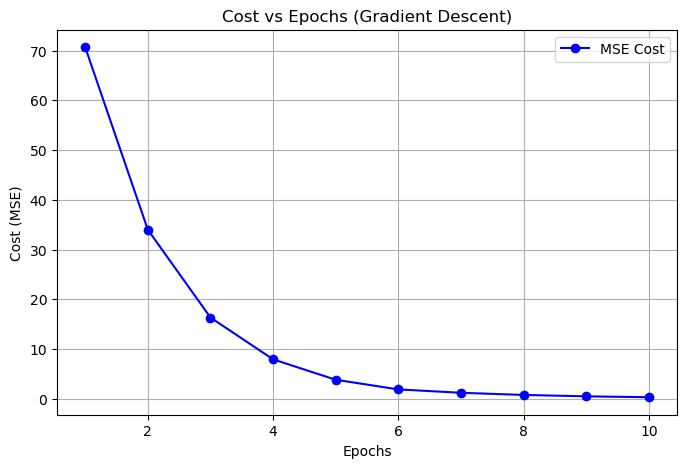

In [2]:
# 15 Plot cost vs epochs and save the plot as gd_loss.png.
import matplotlib.pyplot as plt
costs = [70.6667, 33.9947, 16.3500, 7.9450, 3.8472, 1.9020, 1.2276, 0.7940, 0.5150, 0.3355]


epochs = list(range(1, len(costs) + 1))
# Create the plot
plt.figure(figsize=(8,5))
plt.plot(epochs, costs, marker='o', color='blue', label='MSE Cost')
plt.title('Cost vs Epochs (Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.legend()

# Save the plot as 'gd_loss.png'
plt.savefig('gd_loss.png')

# Display the plot
plt.show()
